# Circuiti 3

In [2223]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Circuito RC

In [2224]:
R = 266.6 #ohm
R_tot = R + 50 
C = 10 * 10 ** (-9) #farad

freq = 1 / (R_tot*C*2*np.pi)
print(freq)

50270.038879309956


In [2225]:
data = np.loadtxt("Dati/RC_v2.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento VB / VA

Modulo

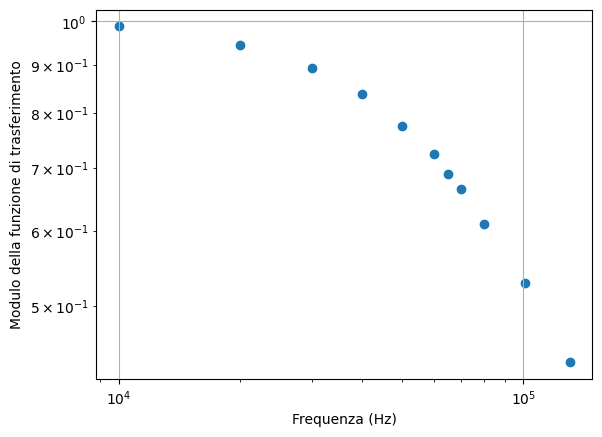

In [2226]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

Fase

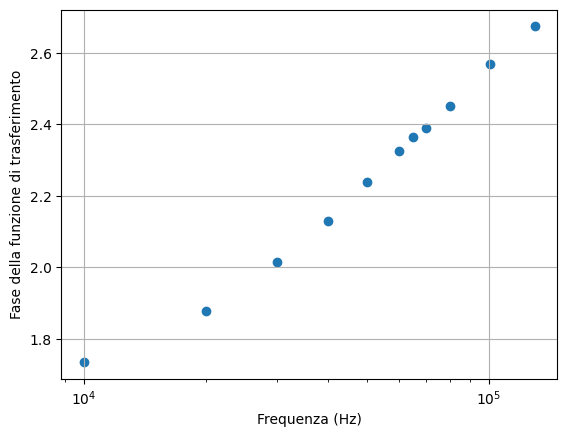

In [2227]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [2228]:
def model(x,a):
    return a / x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.931 (χ²/ndof = 0.4)      │              Nfcn = 18               │
│ EDM = 1.89e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -64.0e3  │   0.8e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 5.96e+05 │
└───┴──────────┘

p value: 0.9503865521256307
10.0


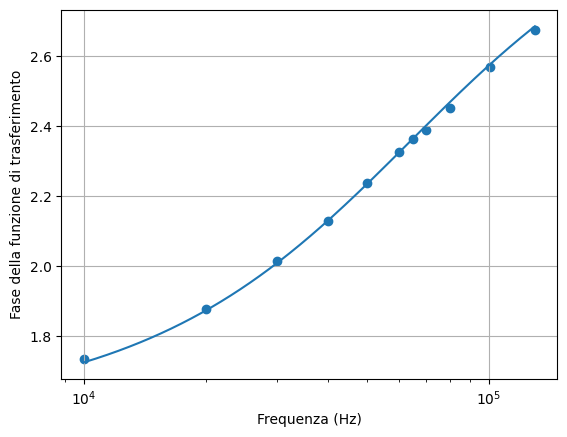

In [2229]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Tensione ai capi della resistenza

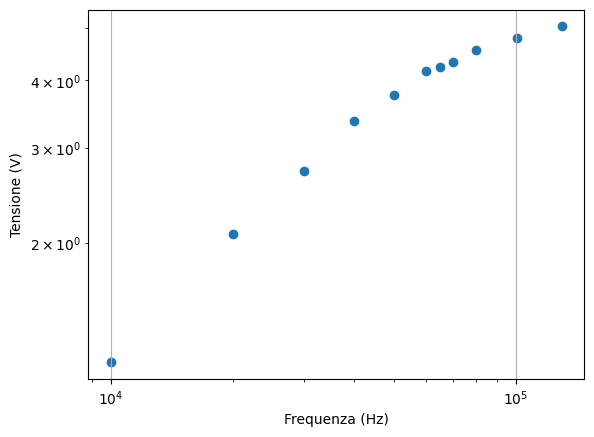

In [2230]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Tensione (V)")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vin_out)

plt.grid()
plt.show()

In [2231]:
def model(x,a,b):
    return 1 / np.sqrt(a + b/(x**2))

V_err = 0.04 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_14028\3462231676.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.048 (χ²/ndof = 0.7)      │              Nfcn = 168              │
│ EDM = 1.27e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0371   │  0.0019   │            │            │         │         │       │
│ 1 │ b    │   76e6    │    4e6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────┐
│   │               a               b │
├───┼─────────────────────────────────┤
│ a │        3.49e-06 -4.9698541946e3 │
│ b │ -4.9698541946e3        1.97e+13 │
└───┴─────────────────────────────────┘

p value: 0.7350746197556823
9.0


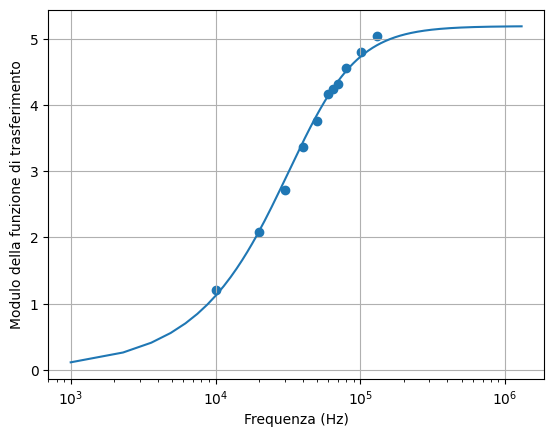

In [2232]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(min(freq)/10,max(freq)*10,1000)
y = model(x,m.values["a"],m.values["b"])
plt.plot(x,y)

plt.grid()
plt.show()

### Circuito RL

In [2233]:
R = 266.6 #ohm
R_tot = R + 50 
L = 35 * 10 ** (-3) #farad

freq = R_tot / (L*2*np.pi)
print(freq)

1439.6701423684017


In [2234]:
data = np.loadtxt("Dati/RL.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(np.pi/2 + data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

#### Funzione di trasferimento VB / VA

Modulo

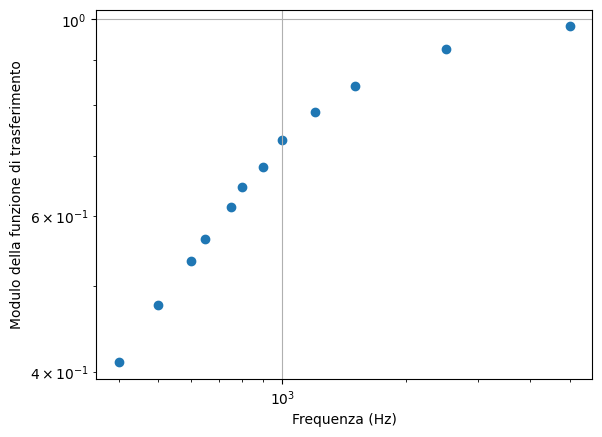

In [2235]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

Fase

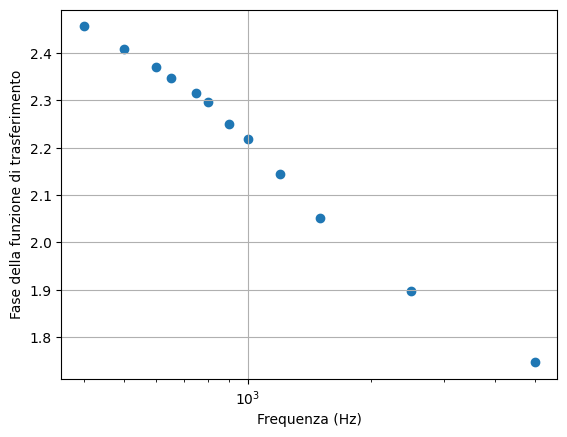

In [2236]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)

plt.grid()
plt.show()

In [2237]:
def model(x,a):
    return a * x

tan_ph = np.tan(phdiff)
ph_err = 0.04 * tan_ph

minimi_quadrati = LeastSquares(freq, tan_ph, ph_err, model)

m = Minuit(minimi_quadrati, a = -100)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 183.7 (χ²/ndof = 16.7)     │              Nfcn = 20               │
│ EDM = 1.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ -1.382e-3 │ 0.016e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 2.61e-10 │
└───┴──────────┘

p value: 0.0
11.0


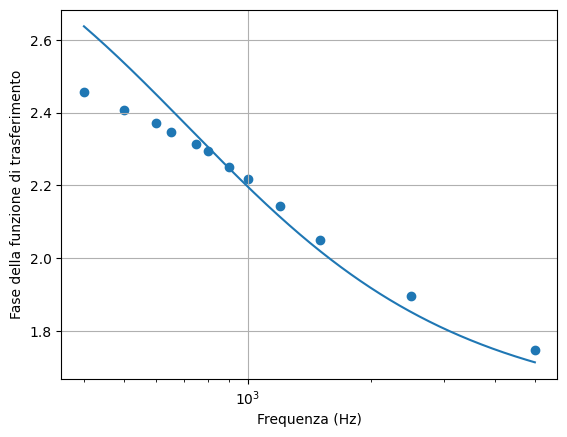

In [2238]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, phdiff)
x = np.linspace(min(freq),max(freq),10000)
y = np.pi + np.arctan(model(x,m.values["a"]))
plt.plot(x,y)

plt.grid()
plt.show()

#### Tensione ai capi della resistenza

In [2239]:
def model(x,a,b):
    return 1 / np.sqrt(a + b*(x**2))

V_err = 0.02 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 0.005, b = 0.00000001)
m.strategy = 2
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.71 (χ²/ndof = 0.8)       │              Nfcn = 113              │
│ EDM = 3.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  43.5e-3  │  1.0e-3   │            │            │         │         │       │
│ 1 │ b    │  28.2e-9  │  0.9e-9   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────┐
│   │             a             b │
├───┼─────────────────────────────┤
│ a │      9.03e-07 -479.9464e-15 │
│ b │ -479.9464e-15      7.42e-19 │
└───┴─────────────────────────────┘

p value: 0.6571231028505302
10.0


### Circuito RLC

### Funzione di trasferimento della resistenza

In [2240]:
L = 14 * 10 ** (-3)
C = 10 * 10 ** (-9)
R = 266.6 #ohm
R_tot = R + 50 
V0 = 6.5

omega0 = 1/np.sqrt(L*C)
print(omega0/(2*np.pi))

13451.047731519027


In [2241]:
data = np.loadtxt("Dati/RLC_R.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

freq_R = np.array(freq)
Vin_R = np.array(Vin)
Vout_R = np.array(Vout)
phdiff_R = np.array(phdiff)

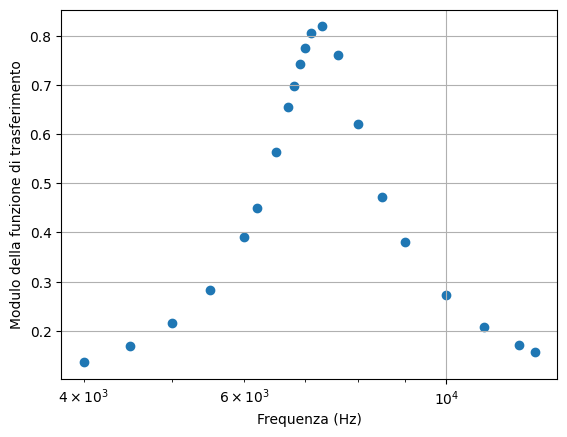

In [2242]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [2243]:
a0 = 1/(V0**2) - (2*L/C) / ((R * V0)**2)
b0 = L**2 / ((R*V0)**2)
c0 = 1 / ((C*R*V0)**2)
print(a0,b0,c0)

-0.9087501747993895 6.526931696968508e-11 3330067192.33087


In [2244]:
def model(x,a,b,c):
    return 1 / np.sqrt(a + b*x**2 + c/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0, c = c0)
m.strategy = 2
m.limits["a"] = (None, 0)
m.limits["b", "c"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_14028\192734475.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(a + b*x**2 + c/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.97 (χ²/ndof = 0.7)      │              Nfcn = 446              │
│ EDM = 2.32e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -62.1   │    1.0    │            │            │         │    0    │       │
│ 1 │ b    │  596e-9   │   9e-9    │            │            │    0    │         │       │
│ 2 │ c    │  1.696e9  │  0.026e9  │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────────────────────────────┐
│   │                     a                     b                     c │
├───┼───────────────────────────────────────────────────────────────────┤
│ a │                 0.926        -8.69671436e-9         -24.1472764e6 │
│ b │        -8.69671436e-9              8.44e-17 219.55951722415014e-3 │
│ c │         -24.1472764e6 219.55951722415014e-3              6.49e+14 │
└───┴───────────────────────────────────────────────────────────────────┘

p value: 0.8487189389477987
18.0


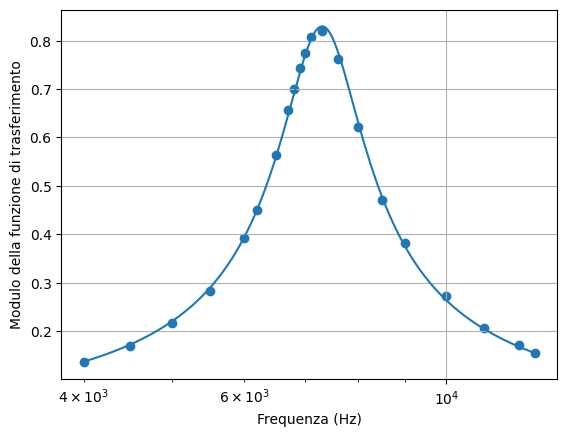

In [2245]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout/Vin)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.show()

#### Funzione di trasferimento dell'induttore v1 (failed)

In [2246]:
R = 300 #ohm
C = 10 * 10 ** (-9) #farad
L = 10**(-3) #henry, non lo sappiamo ordine di grandezza
V0 = 6 #volt

In [2247]:
data = np.loadtxt("Dati/RLC_Lv1.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0]
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

freq_L = np.array(freq)
Vin_L = np.array(Vin)
Vout_L = np.array(Vout)
phdiff_L = np.array(phdiff)

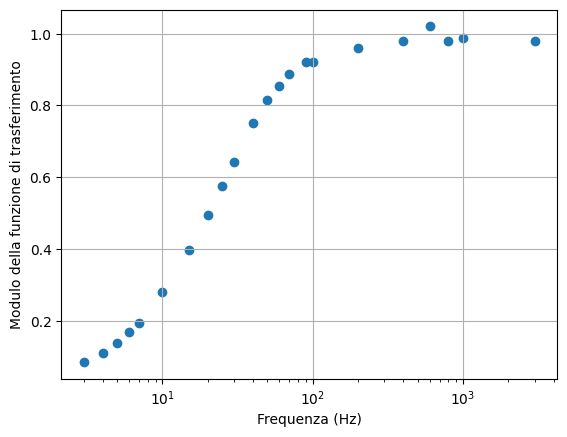

In [2248]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [2249]:
a0 = R**2/(L**2) - 2/(C*L)
b0 = 1
c0 = 1/(C*L)**2
print(a0,b0,c0)

-109999999999.99997 1 9.999999999999998e+21


In [2250]:
def model(x,a,b,c):
    return x / np.sqrt(a + b*x**2 + c/(x**2))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0, c = c0)
m.strategy = 2
m.limits["b", "c"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.5e+04 (χ²/ndof = 2894.7) │              Nfcn = 83               │
│ EDM = 5.29e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │-110.000000000e9│0.000000002e9│            │            │         │         │       │
│ 1 │ b    │    0.0    │    1.2    │            │            │    0    │         │       │
│ 2 │ c    │   1e22    │   0e22    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │      4 -0.000      0 │
│ b │ -0.000 0.0112  0.000 │
│ c │      0  0.000      4 │
└───┴──────────────────────┘

p value: 0.0
19.0


#### Funzione di trasferimento dell'induttore (v2)

In [2251]:
data = np.loadtxt("Dati/RLC_Lv1.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

#### Funzione di trasferimento del condensatore

In [2252]:
R = 300 #ohm
C = 10 * 10 ** (-9) #farad
L = 10**(-3) #henry, non lo sappiamo ordine di grandezza
V0 = 6 #volt

In [2253]:
data = np.loadtxt("Dati/RLC_C.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

freq_C = np.array(freq)
Vin_C = np.array(Vin)
Vout_C = np.array(Vout)
phdiff_C = np.array(phdiff)

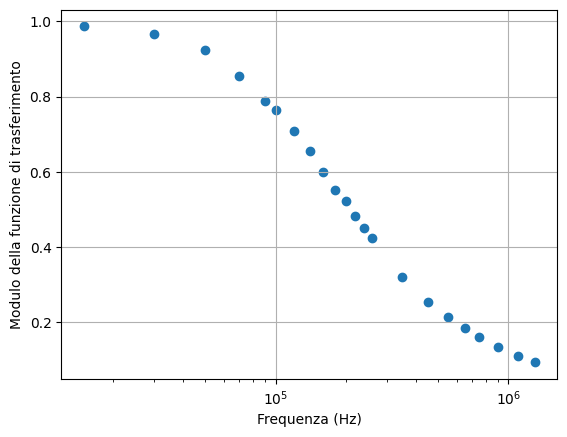

In [2254]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [2255]:
a0 = (R*C/V0)**2 - 2*L*C/(V0**2)
b0 = (L*C/V0)**2
c0 = 1/V0**2
print(a0,b0,c0)

-3.055555555555556e-13 2.7777777777777782e-24 0.027777777777777776


In [2256]:
def model(x,a,b,c):
    return 1 / (x * np.sqrt(a + b*x**2 + c/(x**2)))

V_err = 0.02 * Vout/Vin

minimi_quadrati = LeastSquares(freq, Vout/Vin, V_err, model)

m = Minuit(minimi_quadrati, a = a0, b = b0, c = c0)
m.strategy = 2
m.limits["b", "c"] = (0, None)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

E VariableMetricBuilder Initial matrix not pos.def.


C:\Users\tassi\AppData\Local\Temp\ipykernel_14028\3004766867.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (x * np.sqrt(a + b*x**2 + c/(x**2)))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.499e+04 (χ²/ndof = 2894.4)│              Nfcn = 680              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 8.0126e-2 │    nan    │            │            │         │         │       │
│ 1 │ b    │1.7764e-15 │    nan    │            │            │    0    │         │       │
│ 2 │ c    │ 2.7778e-2 │    nan    │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │   a   b   c │
├───┼─────────────┤
│ a │ nan nan nan │
│ b │ nan nan nan │
│ c │ nan nan nan │
└───┴─────────────┘

p value: 0.0
19.0
